In [1]:
import numpy as np 
#import yaml
import os 
import matplotlib.pyplot as plt

def csvread(name):
    dataraw = open(name+'.csv','r')
    
    # Empty dictionary for each column
    data_rmsd = {}
    counter = 0
    for line in dataraw:
        if line.strip():
            line = line.strip("\n' '")
            line = line.split(",")
            # Storing the data in the dictionary
            if counter == 0:
                data_rmsd['frame'] = []
                counter += 1
                for j in np.arange(len(line)):
                    data_rmsd[str(j)] = []
            for i in np.arange(len(line)):
                element = line[i]
                if i == 0:
                    data_rmsd['frame'].append(int(element))
                else:
                    data_rmsd[str(i)].append(float(element))

    return data_rmsd


def refined_rmsd_resting(name):
    data = csvread(name)
    
    collected = []
    for n in np.arange(len(data)-2):
        test = data[str(n+1)][-1]
        if test < 500:
            collected.append(n+1)
            
    counter = 0 
    
    for m in collected:
        if counter == 0:
            total = np.asarray(data[str(m)])
            counter += 1
        else:
            total = total + np.asarray(data[str(m)])
    
    avg = total/len(collected)
    
    msd = avg*avg
    
    return avg, msd, data['frame']

def refined_rmsd_activated(name):
    data = csvread(name)
    
    collected = []
    for n in np.arange(len(data)-2):
        test = data[str(n+1)][-1]
        if test < 100:
            collected.append(n+1)
            
    counter = 0 
    
    for m in collected:
        if counter == 0:
            total = np.asarray(data[str(m)])
            counter += 1
        else:
            total = total + np.asarray(data[str(m)])
    
    avg = total/len(collected)
    
    msd = avg*avg

In [2]:
def plotter4(name1,name2,name3,name4,description1,description2,description3,description4):
    os.chdir('../'+name1)
    avg1, msd1, time1 = refined_rmsd_resting('rmsdresting1')
    data1 = csvread('resting_density1')
    data2 = csvread('activated_density1')

    os.chdir('../'+name2)
    avg2, msd2, time2 = refined_rmsd_resting('rmsdresting1')
    data3 = csvread('resting_density1')
    data4 = csvread('activated_density1')

    os.chdir('../'+name3)
    avg3, msd3, time3 = refined_rmsd_resting('rmsdresting1')
    data5 = csvread('resting_density1')
    data6 = csvread('activated_density1')
    
    os.chdir('../'+name4)
    avg4, msd4, time4 = refined_rmsd_resting('rmsdresting1')
    data7 = csvread('resting_density1')
    data8 = csvread('activated_density1')
    
    
    truncateddata1={}
    truncateddata2={}
    truncateddata3={}
    truncateddata4={}
    truncateddata5={}
    truncateddata6={}
    truncateddata7={}
    truncateddata8={}
    sumcount1 = 0
    sumcount2 = 0
    sumcount5 = 0
    sumcount6 = 0
    
    x = [25,75,125,175,225,275,325,375,425,475]
    truncatedtime = []
    
    for i in np.arange(len(data1['frame'])):
        if i%100 == 0 or i == len(data1['frame'])-1:
            truncateddata1[str(i)] = []
            truncateddata2[str(i)] = []
            truncateddata3[str(i)] = []
            truncateddata4[str(i)] = []
            truncateddata5[str(i)] = []
            truncateddata6[str(i)] = []
            truncateddata7[str(i)] = []
            truncateddata8[str(i)] = []
            truncatedtime.append(i)
            for j in np.arange(len(x)):
                element1 = data1[str(j+1)][i]
                element2 = data2[str(j+1)][i]
                element3 = data3[str(j+1)][i]
                element4 = data4[str(j+1)][i]
                element5 = data5[str(j+1)][i]
                element6 = data6[str(j+1)][i]
                element7 = data7[str(j+1)][i]
                element8 = data8[str(j+1)][i]
                #if i == len(data1['frame'])-1:
                #    sumcount1 += element1
                #    sumcount2 += element2
                #    sumcount3 += element3
                #    sumcount4 += element4
                #    sumcount5 += element5
                #    sumcount6 += element6
                #    sumcount7 += element7
                #    sumcount8 += element8
                truncateddata1[str(i)].append(element1)
                truncateddata2[str(i)].append(element2)
                truncateddata3[str(i)].append(element3)
                truncateddata4[str(i)].append(element4)
                truncateddata5[str(i)].append(element5)
                truncateddata6[str(i)].append(element6)
                truncateddata7[str(i)].append(element7)
                truncateddata8[str(i)].append(element8)
    
    
    
    plt.figure(figsize=(12,4),dpi=150)
    plt.subplot(1,2,1)
    plt.tick_params(direction='in',labelsize=10)
    plt.title('RMSD')
    plt.plot(time1,avg1,'k',lw=3,alpha=1,label=description1)
    plt.plot(time2,avg2,'b',lw=3,alpha=1,label=description2)
    plt.plot(time3,avg3,'m',lw=3,alpha=1,label=description3)
    plt.plot(time4,avg4,'g',lw=3,alpha=1,label=description4)

    plt.xlabel('steps (x1000)')
    plt.ylabel('distance (a.u.)')
    plt.legend(loc=0,fontsize=8)
    plt.tight_layout()

    plt.subplot(1,2,2)
    plt.tick_params(direction='in',labelsize=10)
    plt.title('MSD')
    plt.plot(time1,msd1,'k',lw=3,alpha=1,label=description1)
    plt.plot(time2,msd2,'b',lw=3,alpha=1,label=description2)
    plt.plot(time3,msd3,'m',lw=3,alpha=1,label=description3)
    plt.plot(time4,msd4,'g',lw=3,alpha=1,label=description4)

    plt.xlabel('steps (x1000)')
    plt.ylabel('$distance^2$ (a.u.)')
    plt.legend(loc=0,fontsize=8)
    plt.tight_layout()
    
    plt.figure(figsize=(24,4),dpi=150)
    plt.subplot(1,4,1)
    plt.tick_params(direction='in',labelsize=10)
    plt.title(description1)
    count = 1
    for i in truncatedtime:
        if i == 999:
            plt.plot(x,np.asarray(truncateddata1[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime),label='Resting')
        else:
            plt.plot(x,np.asarray(truncateddata1[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime))
        count += 1
        
    count = 1
    for i in truncatedtime:
        if i == 999:
             plt.plot(x,np.asarray(truncateddata2[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime),label='Activated')        
        else:
            plt.plot(x,np.asarray(truncateddata2[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime))
        count += 1

    plt.ylim([-0.05,1.05])
    plt.xlabel('Dist. x-axis (a.u.)')
    plt.ylabel('normalized density by count')
    plt.legend(loc=0,fontsize=9)
    plt.tight_layout()
    
    plt.subplot(1,4,2)
    plt.tick_params(direction='in',labelsize=10)
    plt.title(description2)
    count = 1
    for i in truncatedtime:
        if i == 999:
            plt.plot(x,np.asarray(truncateddata3[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime),label='Resting')
        else:
            plt.plot(x,np.asarray(truncateddata3[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime))
        count += 1
        
    count = 1
    for i in truncatedtime:
        if i == 999:
            plt.plot(x,np.asarray(truncateddata4[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime),label='Activated')
        else:
            plt.plot(x,np.asarray(truncateddata4[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime))
        count += 1
    
    plt.ylim([-0.05,1.05])
    plt.xlabel('Dist. x-axis (a.u.)')
    plt.ylabel('normalized density by count')
    plt.legend(loc=0,fontsize=9)
    plt.tight_layout()
    
    
    plt.subplot(1,4,3)
    plt.tick_params(direction='in',labelsize=10)
    plt.title(description3)
    count = 1
    for i in truncatedtime:
        if i == 999:
            plt.plot(x,np.asarray(truncateddata5[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime),label='Resting')
        else:
            plt.plot(x,np.asarray(truncateddata5[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime))
        count += 1
        
    count = 1
    for i in truncatedtime:
        if i == 999:
             plt.plot(x,np.asarray(truncateddata6[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime),label='Activated')        
        else:
            plt.plot(x,np.asarray(truncateddata6[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime))
        count += 1
    
    plt.ylim([-0.05,1.05])
    plt.xlabel('Dist. x-axis (a.u.)')
    plt.ylabel('normalized density by count')
    plt.legend(loc=0,fontsize=9)
    plt.tight_layout()
    
    plt.subplot(1,4,4)
    plt.tick_params(direction='in',labelsize=10)
    plt.title(description4)
    count = 1
    for i in truncatedtime:
        if i == 999:
            plt.plot(x,np.asarray(truncateddata7[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime),label='Resting')
        else:
            plt.plot(x,np.asarray(truncateddata7[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime))
        count += 1
        
    count = 1
    for i in truncatedtime:
        if i == 999:
             plt.plot(x,np.asarray(truncateddata8[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime),label='Activated')        
        else:
            plt.plot(x,np.asarray(truncateddata8[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime))
        count += 1
    
    plt.ylim([-0.05,1.05])
    plt.xlabel('Dist. x-axis (a.u.)')
    plt.ylabel('normalized density by count')
    plt.legend(loc=0,fontsize=9)
    plt.tight_layout()
    
    return

def plotter2(name1,name2,description1,description2):
    os.chdir('../'+name1)
    avg1, msd1, time1 = refined_rmsd_resting('rmsdresting1')
    data1 = csvread('resting_density1')
    data2 = csvread('activated_density1')
    #avg2, msd2, time2 = refined_rmsd_resting('rmsdresting2')
    #avg3, msd3, time3 = refined_rmsd_resting('rmsdresting3')
    #avg4, msd4, time4 = refined_rmsd_resting('rmsdresting4')

    os.chdir('../'+name2)
    avg5, msd5, time5 = refined_rmsd_resting('rmsdresting1')
    data5 = csvread('resting_density1')
    data6 = csvread('activated_density1')
    #avg6, msd6, time6 = refined_rmsd_resting('rmsdresting2')
    #avg7, msd7, time7 = refined_rmsd_resting('rmsdresting3')
    #avg8, msd8, time8 = refined_rmsd_resting('rmsdresting4')
    
    truncateddata1={}
    truncateddata2={}
    truncateddata5={}
    truncateddata6={}
    sumcount1 = 0
    sumcount2 = 0
    sumcount5 = 0
    sumcount6 = 0
    
    x = [25,75,125,175,225,275,325,375,425,475]
    truncatedtime = []
    
    for i in np.arange(len(data1['frame'])):
        if i%100 == 0 or i == len(data1['frame'])-1:
            truncateddata1[str(i)] = []
            truncateddata2[str(i)] = []
            truncateddata5[str(i)] = []
            truncateddata6[str(i)] = []
            truncatedtime.append(i)
            for j in np.arange(len(x)):
                element1 = data1[str(j+1)][i]
                element2 = data2[str(j+1)][i]
                element5 = data5[str(j+1)][i]
                element6 = data6[str(j+1)][i]
                if i == len(data1['frame'])-1:
                    sumcount1 += element1
                    sumcount2 += element2
                    sumcount5 += element5
                    sumcount6 += element6
                truncateddata1[str(i)].append(element1)
                truncateddata2[str(i)].append(element2)
                truncateddata5[str(i)].append(element5)
                truncateddata6[str(i)].append(element6)
    
    
    
    plt.figure(figsize=(12,8),dpi=150)
    plt.subplot(2,2,1)
    plt.tick_params(direction='in',labelsize=10)
    plt.title('RMSD')
    plt.plot(time1,avg1,'k',lw=3,alpha=1,label=description1)
    #plt.plot(time2,avg2,'k',lw=3,alpha=0.8,label=r'$\rho_{Act.}$ = 0.004: OFF')
    #plt.plot(time3,avg3,'k',lw=3,alpha=0.6,label=r'$\rho_{Act.}$ = 0.016: OFF')
    #plt.plot(time4,avg4,'k',lw=3,alpha=0.4,label=r'$\rho_{Act.}$ = 0.02: OFF')

    plt.plot(time5,avg5,'b',lw=3,alpha=1,label=description2)
    #plt.plot(time6,avg6,'b',lw=3,alpha=0.8,label=r'$\rho_{Act.}$ = 0.004: ON')
    #plt.plot(time7,avg7,'b',lw=3,alpha=0.6,label=r'$\rho_{Act.}$ = 0.0016: ON')
    #plt.plot(time8,avg8,'b',lw=3,alpha=0.4,label=r'$\rho_{Act.}$ = 0.02: ON')

    plt.xlabel('steps (x1000)')
    plt.ylabel('distance (a.u.)')
    plt.legend(loc=0,fontsize=8)
    plt.tight_layout()

    plt.subplot(2,2,2)
    plt.tick_params(direction='in',labelsize=10)
    plt.title('MSD')
    plt.plot(time1,msd1,'k',lw=3,alpha=1,label=description1)
    #plt.plot(time2,msd2,'k',lw=3,alpha=0.8,label=r'$\rho_{Act.}$ = 0.004: OFF')
    #plt.plot(time3,msd3,'k',lw=3,alpha=0.6,label=r'$\rho_{Act.}$ = 0.016: OFF')
    #plt.plot(time4,msd4,'k',lw=3,alpha=0.4,label=r'$\rho_{Act.}$ = 0.02: OFF')

    plt.plot(time5,msd5,'b',lw=3,alpha=1,label=description2)
    #plt.plot(time6,msd6,'b',lw=3,alpha=0.8,label=r'$\rho_{Act.}$ = 0.004: ON')
    #plt.plot(time7,msd7,'b',lw=3,alpha=0.6,label=r'$\rho_{Act.}$ = 0.0016: ON')
    #plt.plot(time8,msd8,'b',lw=3,alpha=0.4,label=r'$\rho_{Act.}$ = 0.02: ON')

    plt.xlabel('steps (x1000)')
    plt.ylabel('distance (a.u.)')
    plt.legend(loc=0,fontsize=8)
    plt.tight_layout()
    
    plt.subplot(2,2,3)
    plt.tick_params(direction='in',labelsize=10)
    plt.title(description1)
    count = 1
    for i in truncatedtime:
        if i == 999:
            plt.plot(x,np.asarray(truncateddata1[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime),label='Resting')
        else:
            plt.plot(x,np.asarray(truncateddata1[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime))
        count += 1
        
    count = 1
    for i in truncatedtime:
        if i == 999:
             plt.plot(x,np.asarray(truncateddata2[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime),label='Activated')        
        else:
            plt.plot(x,np.asarray(truncateddata2[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime))
        count += 1

    #lt.ylim([-0.05,1.05])
    plt.xlabel('Dist. x-axis (a.u.)')
    plt.ylabel('particle coutnt')
    plt.legend(loc=0,fontsize=9)
    plt.tight_layout()
    
    plt.subplot(2,2,4)
    plt.tick_params(direction='in',labelsize=10)
    plt.title(description2)
    count = 1
    for i in truncatedtime:
        if i == 999:
            plt.plot(x,np.asarray(truncateddata5[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime),label='Resting')
        else:
            plt.plot(x,np.asarray(truncateddata5[str(i)])/50,'k',lw=3,alpha=count/len(truncatedtime))
        count += 1
        
    count = 1
    for i in truncatedtime:
        if i == 999:
             plt.plot(x,np.asarray(truncateddata6[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime),label='Activated')        
        else:
            plt.plot(x,np.asarray(truncateddata6[str(i)])/300,'b',lw=3,alpha=count/len(truncatedtime))
        count += 1
    
    #lt.ylim([-0.05,1.05])
    plt.xlabel('Dist. x-axis (a.u.)')
    plt.ylabel('particle coutnt')
    plt.legend(loc=0,fontsize=9)
    plt.tight_layout()
    
    return

# 20 cells vs. 200 cells in narrow block
1. no state variable
2. autocrine
3. no tumor

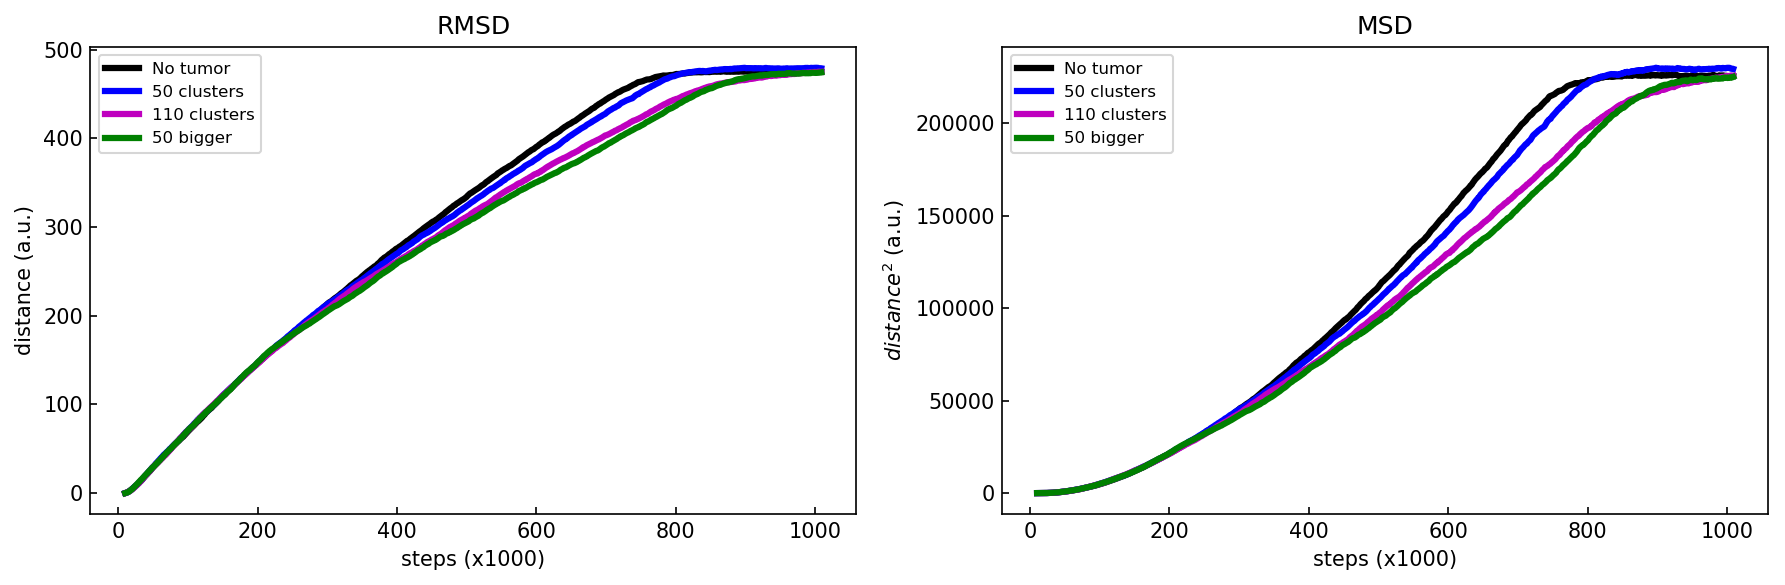

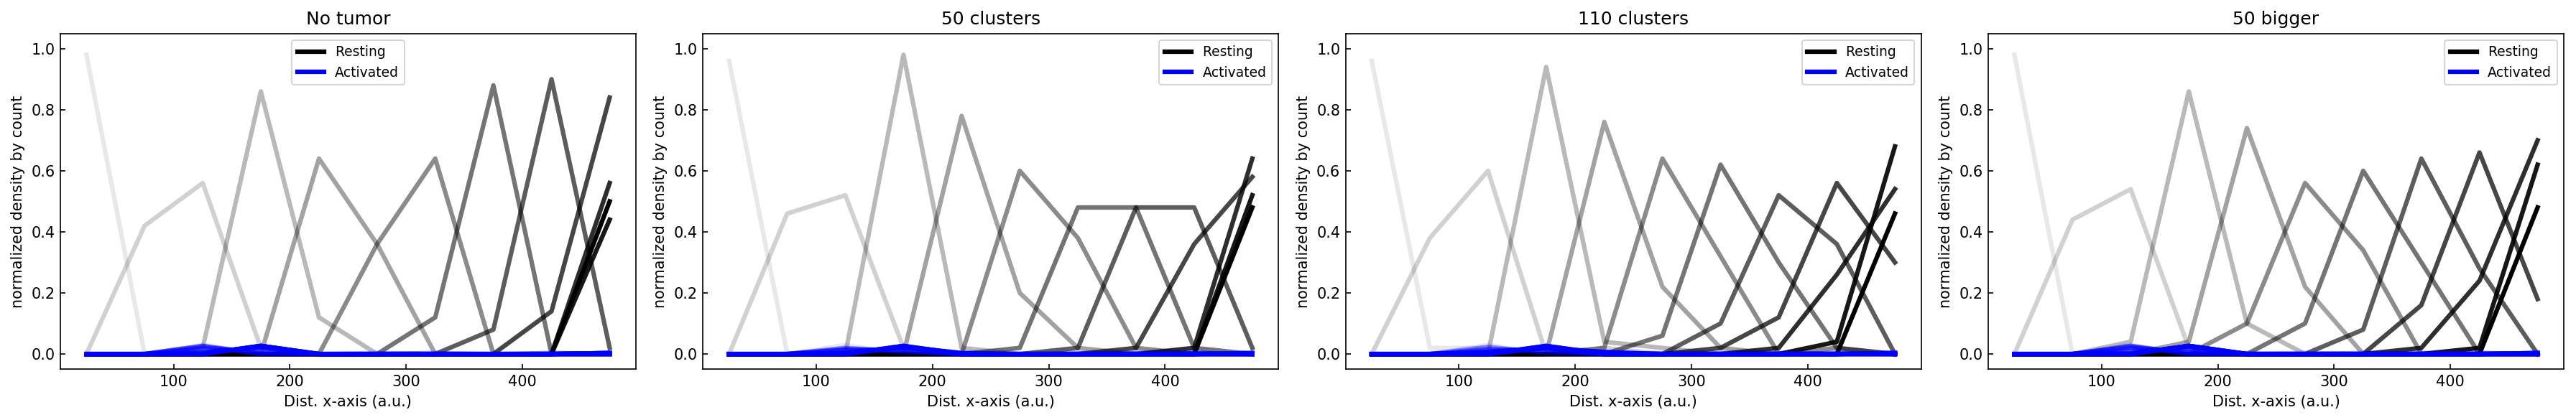

In [3]:
plotter4('ver1','ver2','ver3','ver4','No tumor','50 clusters','110 clusters','50 bigger')

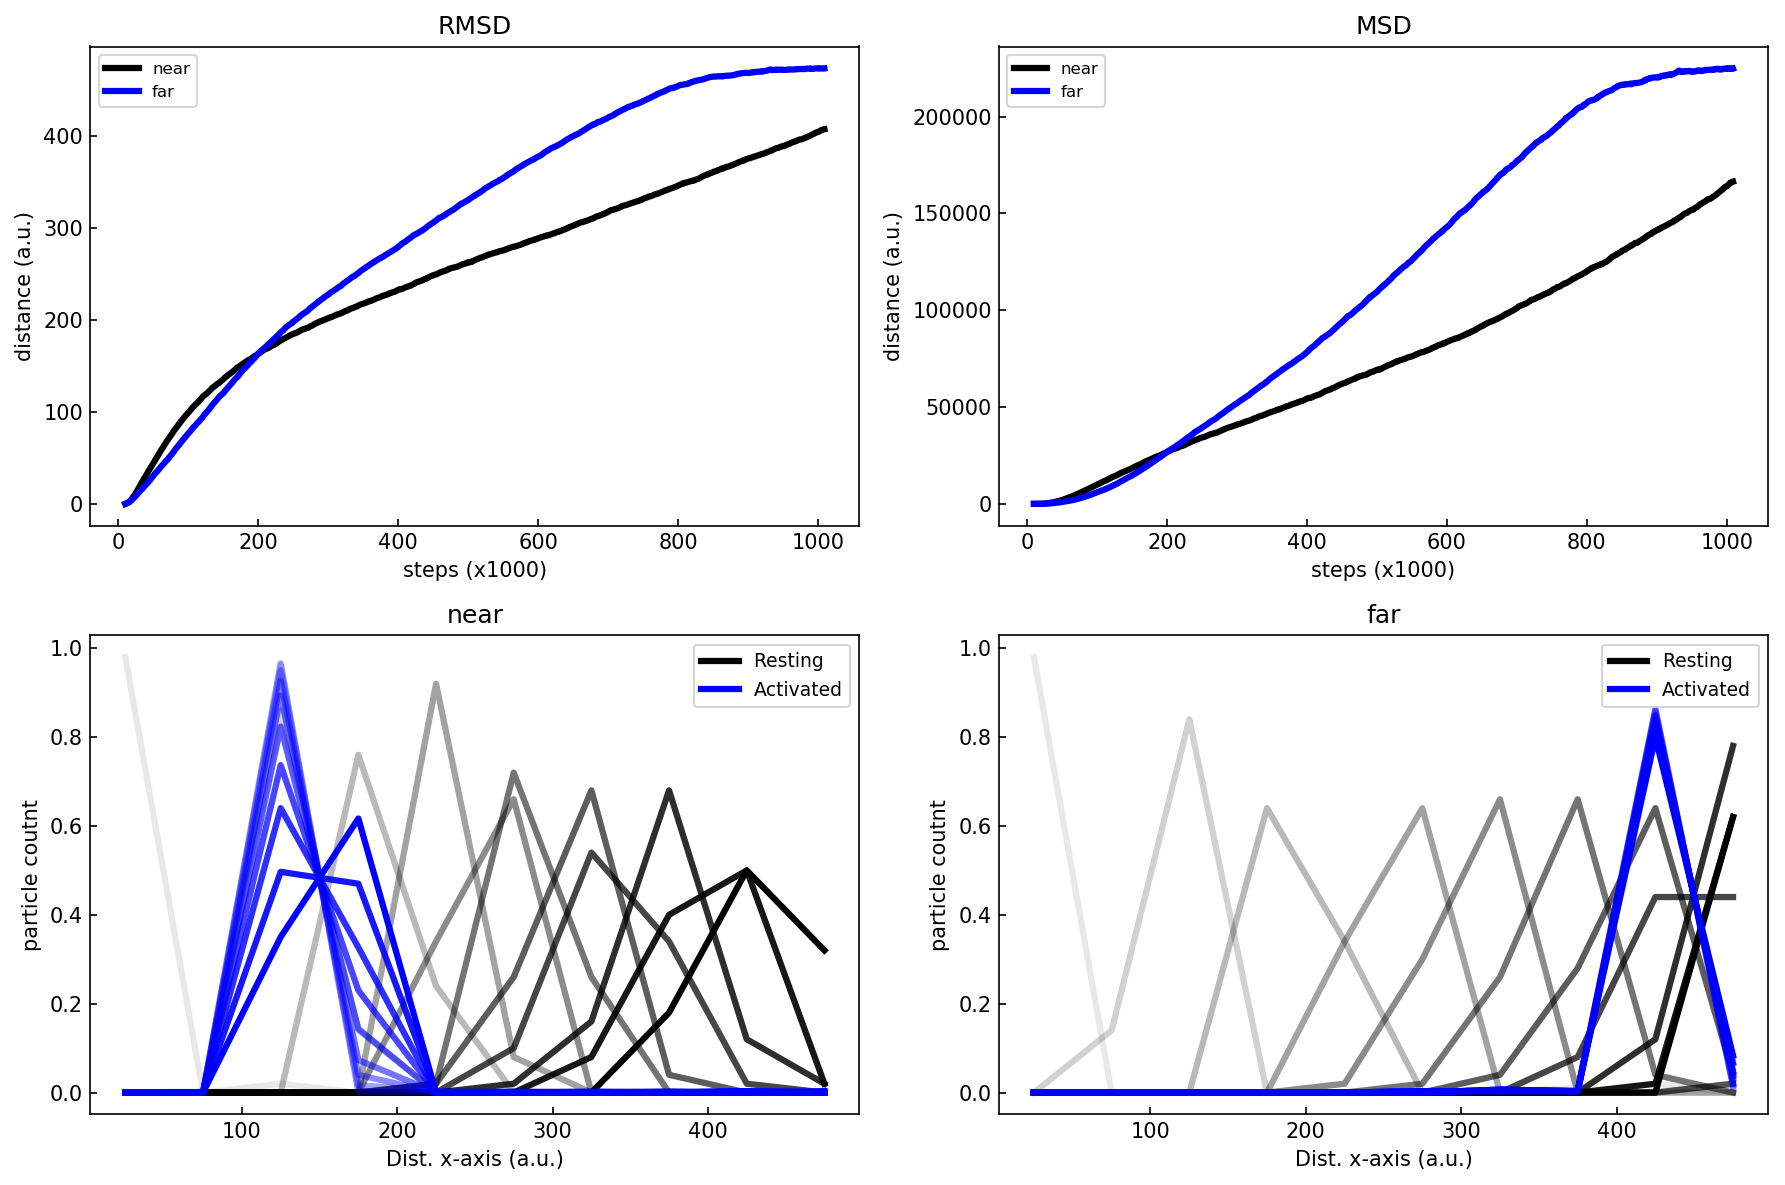

In [3]:
plotter2('ver5','ver6','near','far')

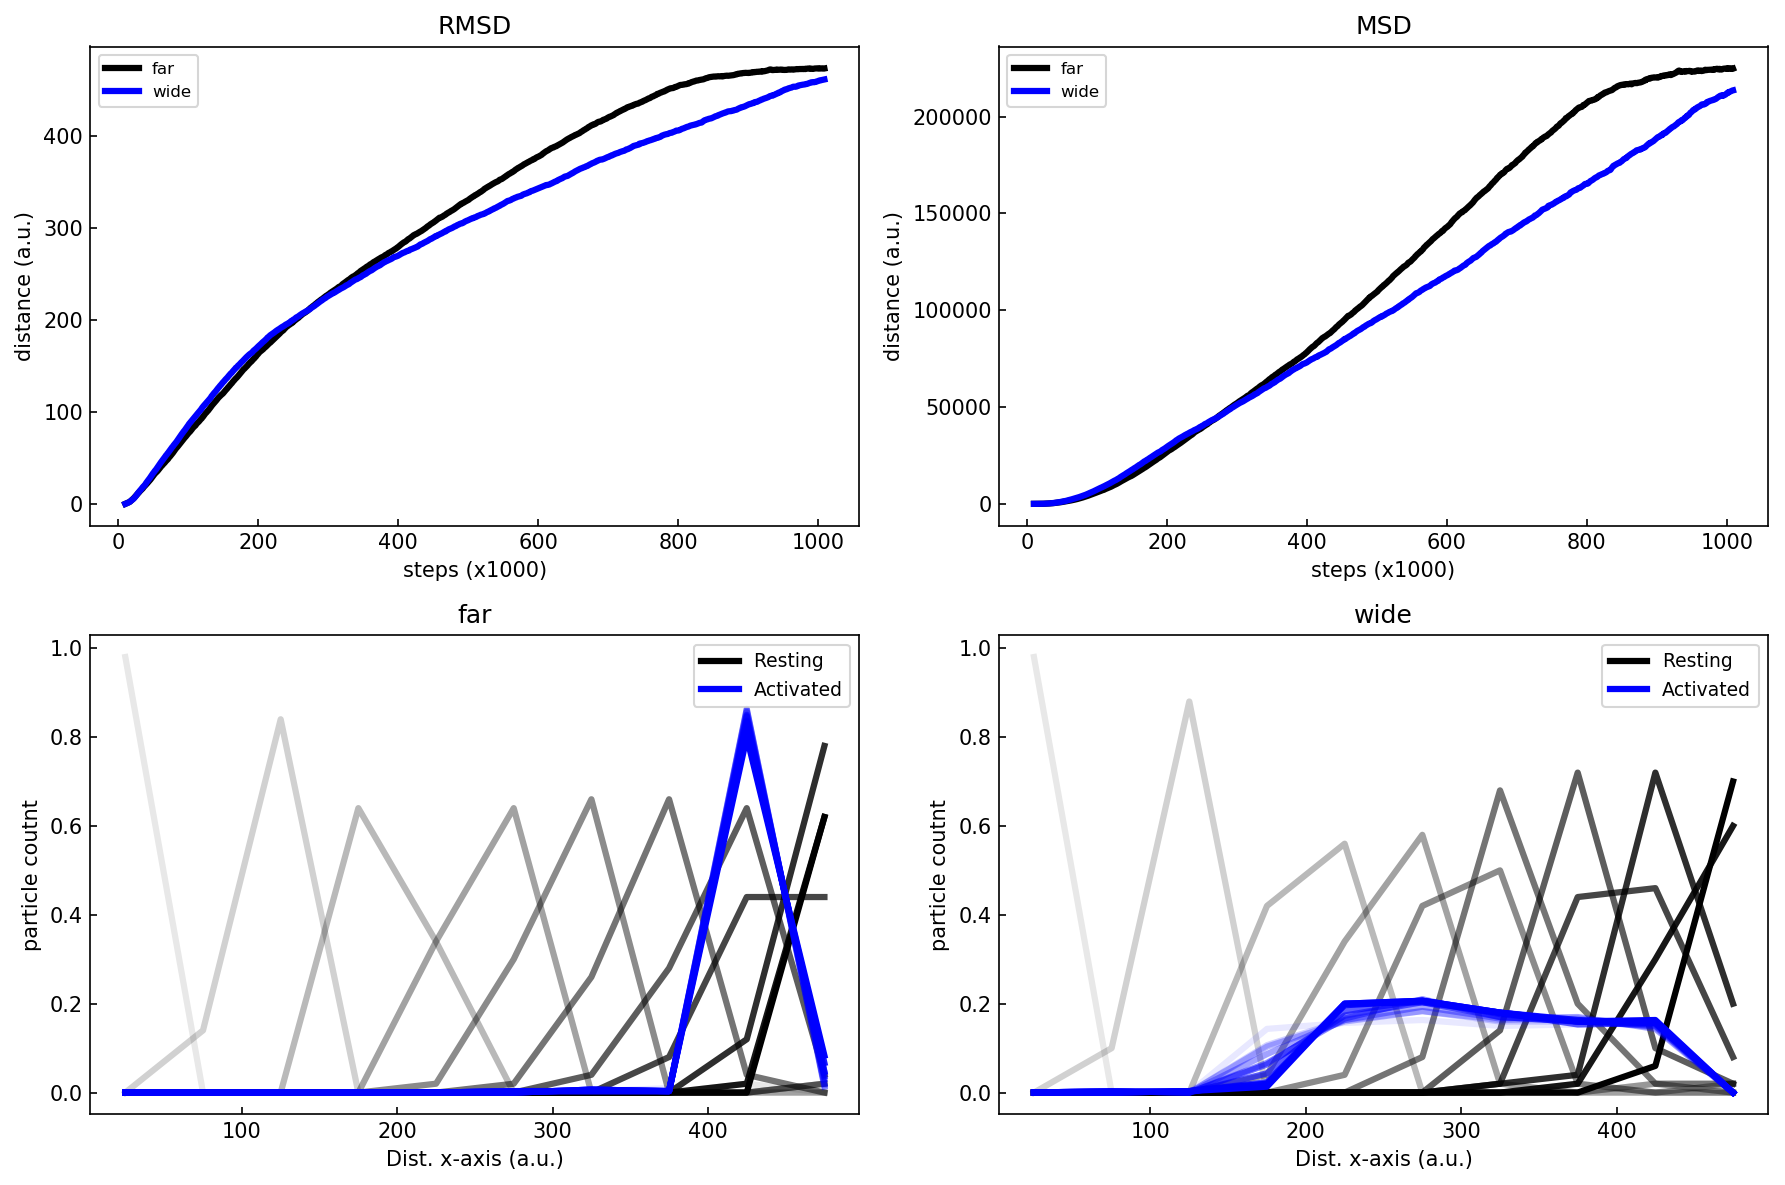

In [4]:
plotter2('ver6','ver7','far','wide')

In [5]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

In [8]:
A = np.array([[1,2],[3,4]])
B = [2,3]

cdist(A,A)

array([[0.        , 2.82842712],
       [2.82842712, 0.        ]])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


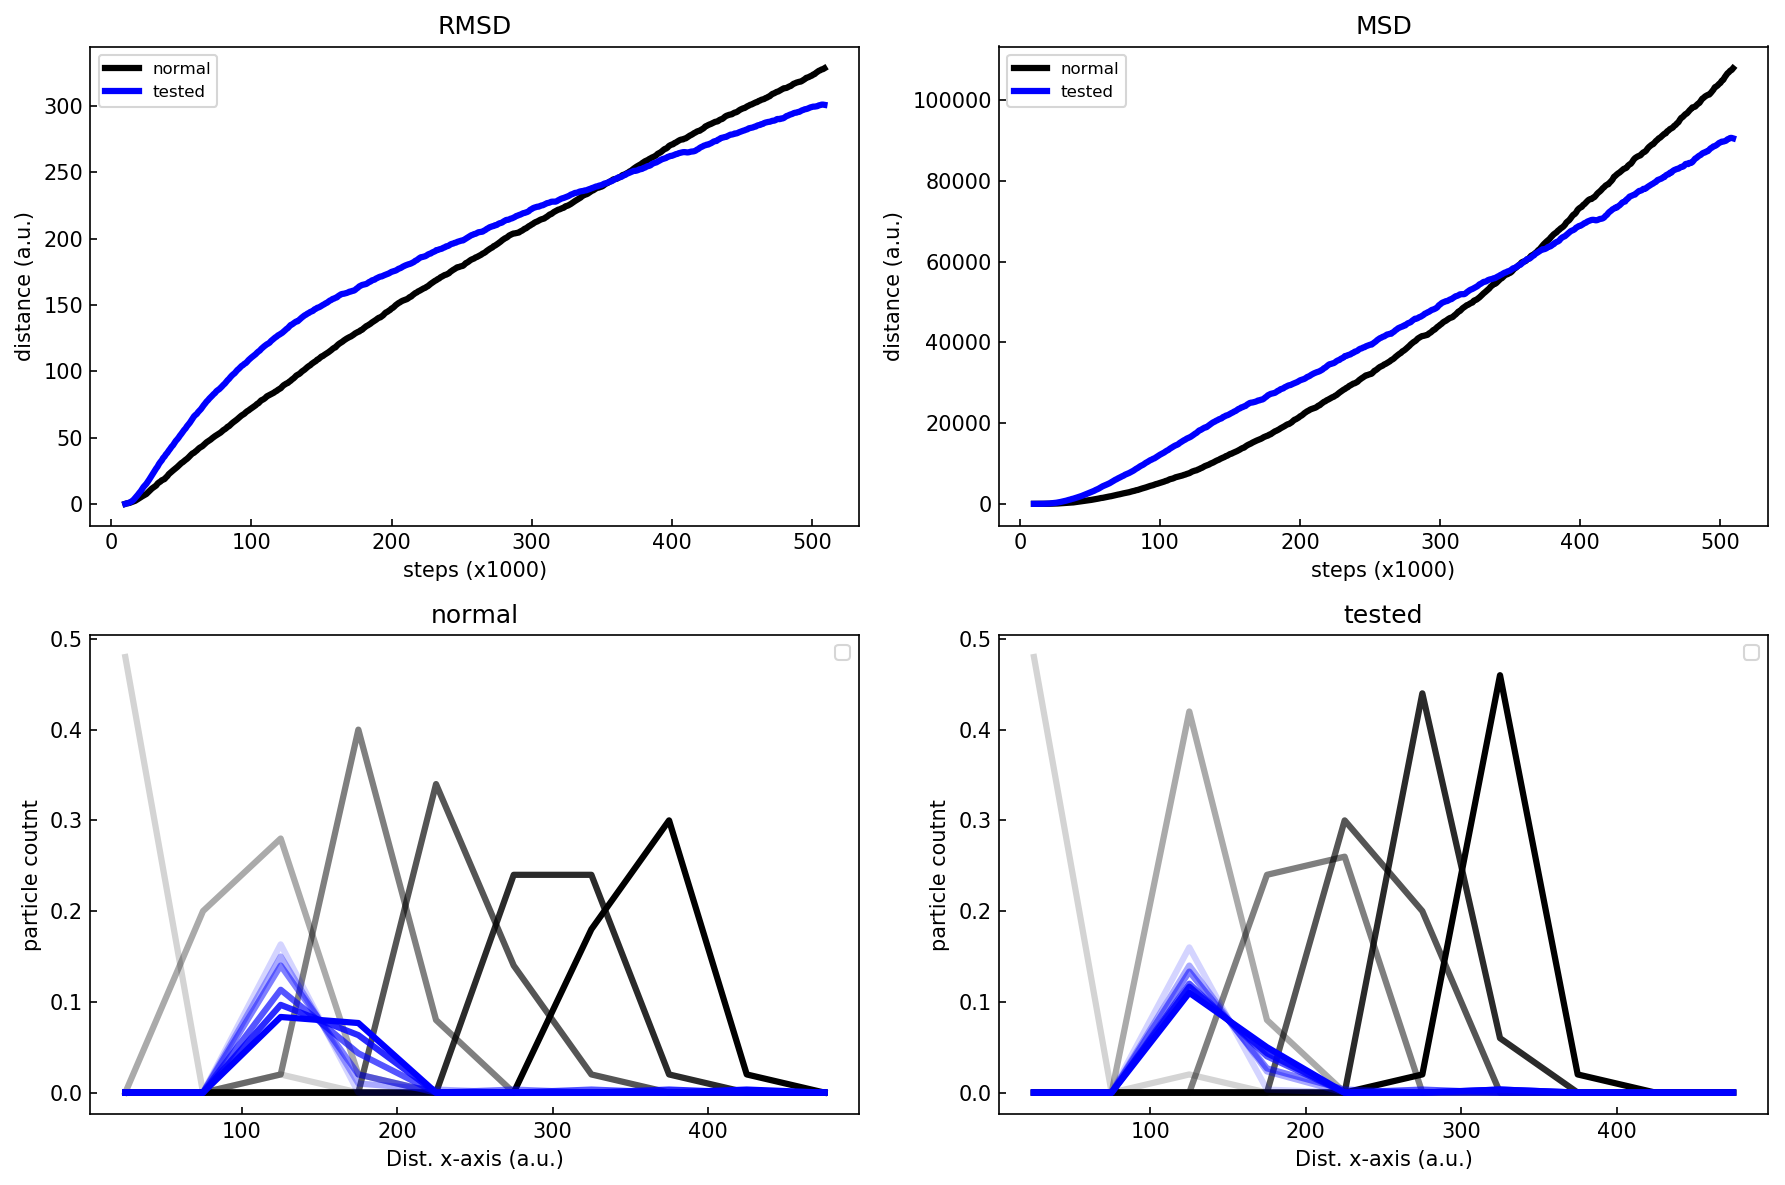

In [3]:
plotter2('test1','test2','normal','tested')